In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import gdown
url = "https://drive.google.com/uc?id=14khOIntWRDhbrE82xsz1iLTLn6P_DoQx"
output = 'data.csv'
gdown.download(url, output, quiet=False)
data = pd.read_csv('data.csv')
data.head()

Downloading...
From (original): https://drive.google.com/uc?id=14khOIntWRDhbrE82xsz1iLTLn6P_DoQx
From (redirected): https://drive.google.com/uc?id=14khOIntWRDhbrE82xsz1iLTLn6P_DoQx&confirm=t&uuid=dda7f6a4-e33f-4cb8-b686-2c7874825947
To: d:\portfolio-projects-learning\data.csv
100%|██████████| 419M/419M [00:21<00:00, 19.5MB/s] 
C:\Users\HERRY\AppData\Local\Temp\ipykernel_13248\2854424412.py:5: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,NaN,man,5.0,7.0,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [3]:
data.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [4]:
data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,stk_year,door_count,seat_count,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,536105.000000,2.462846e+06,2.265813e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,2021.472590,4.052180e+00,4.869694e+00,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,140.476724,9.911850e-01,1.212611e+00,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2015.000000,0.000000e+00,0.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,2017.000000,4.000000e+00,5.000000e+00,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,2017.000000,4.000000e+00,5.000000e+00,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,2018.000000,5.000000e+00,5.000000e+00,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,9990.000000,7.700000e+01,5.170000e+02,2.706149e+12


In [5]:
def missing_values(data):
  missing_count = data.isnull().sum()
  missing_percent = missing_count * 100 / len(data)
  missing_table = pd.concat([missing_count, missing_percent], axis=1)
  missing_table.columns = ['Missing Count', 'Missing Percentage']
  missing_table.sort_values(by='Missing Percentage', ascending=False, inplace = True)
  return missing_table
missing_values(data)

,Missing Count,Missing Percentage
color_slug,3343411,94.103400
stk_year,3016807,84.910828
fuel_type,1847606,52.002583
seat_count,1287099,36.226594
model,1133361,31.899495
body_type,1122914,31.605455
door_count,1090066,30.680918
engine_displacement,743414,20.924076
transmission,741630,20.873863
engine_power,554877,15.617527


karena banyak sekali missing values pada data, maka akan dilakukan handling dengan menggunakan data_stage1 = data.copy()

In [6]:
data_stage1 = data.copy()

Selanjutnya adalah membagi data menjadi dua yaitu high priority (fitur yang logis banget untuk dipertahankan) dan low priority (fitur yang kurang berpengaruh), selanjutnya membagi berdasarkan low latency (kolom lengkap) dan high latency (banyak missing value) dengan variabel target yang digunakan adalah price_eur (memprediksi harga mobil)

In [7]:
# membagi menjadi dua priority yang mempengaruhi mahal dan murahnya mobil
high_priority = data_stage1[['price_eur','mileage', 'engine_power','engine_displacement','fuel_type','transmission','stk_year']]
low_priority = data_stage1[['model','body_type','door_count','seat_count','color_slug']]

In [8]:
# kembangkan def missing_values(data) yang kita miliki
def missing_values_priority(data_stage1, cols):
  missing_list = []
  for col in cols:
    missing_count = data_stage1[col].isnull().sum()
    missing_percent = missing_count * 100/len(data_stage1)
    missing_list.append([col, missing_count, missing_percent])
    missing_table = pd.DataFrame(missing_list, columns=['Column', 'Missing Count', 'Missing Percentage'])
    missing_table = missing_table.sort_values(by='Missing Percentage', ascending=False)
  return missing_table

missing_values_priority(data_stage1, list(high_priority.columns))

,Column,Missing Count,Missing Percentage
6,stk_year,3016807,84.910828
4,fuel_type,1847606,52.002583
3,engine_displacement,743414,20.924076
5,transmission,741630,20.873863
2,engine_power,554877,15.617527
1,mileage,362584,10.205263
0,price_eur,0,0.000000


berdasarkan high_priority didapatkan bahwa yang termasuk high latency (missing values >= 50%) yaitu stk_year dan fuel_type, low_latency (missing values < 50%) yaitu engine displacement, transmission, engine_power, dan mileage. Dengan variabel target adalah price_eur.

Dengan missing values yang memiliki low latency akan langsung melakukan impute missing values, seperti menggunakan impute median, mode, atau mean. Dengan aturan bahwa, impute menggunakan median apabila nilainya numeric normal dan tanpa outlier, impute dengan mean apabila nilainya numeric skewness atau terdapat outlier, dan smenggunakan mode apabila merupakan categorical.

In [9]:
from pandas.core.dtypes.common import is_numeric_dtype
def impute_strategy(data, outlier_threshold = 0.05, skewness_threshold = 0.5):
  imputation_strategies = {}
  data_stage1 = data.copy()
  for col in data_stage1.columns:
    missing_ratio = data_stage1[col].isnull().sum() / len(data_stage1)
    if missing_ratio == 1.0:
      print(f"{col} has no missing values")
      continue
    if pd.api.types.is_numeric_dtype(data_stage1[col]):
      Q1 = data_stage1[col].quantile(0.25)
      Q3 = data_stage1[col].quantile(0.75)
      IQR = Q3 - Q1
      outlier_mask = (data_stage1[col] < Q1 - 1.5 * IQR) | (data_stage1[col] > Q3 + 1.5 * IQR)
      outlier_ratio = outlier_mask.mean()

      if outlier_ratio > outlier_threshold:
        strategy = 'median'
        data_stage1[col] = data_stage1[col].fillna(data_stage1[col].median())
        print(f"{col} impute with {strategy}")
      else:
        strategy = 'mean'
        data_stage1[col] = data_stage1[col].fillna(data_stage1[col].mean())
        print(f"{col} impute with {strategy}")
    else:
      strategy = 'mode'
      data_stage1[col] = data_stage1[col].fillna(data_stage1[col].mode()[0])
      print(f"{col} impute with {strategy}")
  return data_stage1

In [10]:
selected_cols = list(high_priority.columns) + list(low_priority.columns)
data_strategy = impute_strategy(data_stage1)
data_strategy1 = data_strategy[selected_cols].copy()

maker impute with mode
model impute with mode
mileage impute with mean
manufacture_year impute with mean
engine_displacement impute with median
engine_power impute with median
body_type impute with mode
color_slug impute with mode
stk_year impute with mean
transmission impute with mode
door_count impute with median
seat_count impute with median
fuel_type impute with mode
date_created impute with mode
date_last_seen impute with mode
price_eur impute with mean


In [11]:
# start from the least
data_stage1['mileage'] = data_stage1['mileage'].fillna(data_stage1['mileage'].median())
data_stage1['engine_power'] = data_stage1['engine_power'].fillna(data_stage1['engine_power'].median())
data_stage1['transmission'] = data_stage1['transmission'].fillna(data_stage1['transmission'].mode()[0])
data_stage1['engine_displacement'] = data_stage1['engine_displacement'].fillna(data_stage1['engine_displacement'].median())

In [12]:
print(f"{data_stage1['mileage'].isnull().sum()} missing values in mileage")
print(f"{data_stage1['engine_power'].isnull().sum()} missing values in engine_power")
print(f"{data_stage1['transmission'].isnull().sum()} missing values in transmission")
print(f"{data_stage1['engine_displacement'].isnull().sum()} missing values in engine_displacement")

0 missing values in mileage
0 missing values in engine_power
0 missing values in transmission
0 missing values in engine_displacement


terdapat dua kolom dengan high latency yaitu stk_year dan fuel_type, dimana akan menggunakan rule based imputation.
Dimana rule based imputation tidak berlaku apabila missing value lebih dari 50%, sebaiknya mengganti menjadi existed/not existed atau valid/not valid.

Sehingga akan diubah stk_year ditransformasikan menjadi variabel biner yaitu existed vs not existed, serta fuel_type menjadi variabel biner yaitu known vs unknown.

In [13]:
# handle missing value with high latency
data_stage1['stk_year_existence']= np.where(data_stage1['stk_year'].isnull(), 'not existed', 'existed')
data_stage1['fuel_type_knownness']= np.where(data_stage1['fuel_type'].isnull(), 'unknown', 'known')

In [14]:
missing_values_priority(data_stage1, list(low_priority.columns))

,Column,Missing Count,Missing Percentage
4,color_slug,3343411,94.103400
3,seat_count,1287099,36.226594
0,model,1133361,31.899495
1,body_type,1122914,31.605455
2,door_count,1090066,30.680918


Selanjutnya akan dilakukan drop kolom color_slug karena missing value yang sangat tinggi, yaitu hampir mencapai 100%. Drop dilakukan untuk menghindari risiko bias.

In [15]:
# akan dilakukan drop color_slug karena missing values 
low_priority = low_priority.drop(columns=['color_slug'])
data_stage1 = data_stage1.drop(columns=['color_slug'])

In [16]:
# start from the least 
data_stage1['door_count'] = data_stage1['door_count'].fillna(data_stage1['door_count'].median())
data_stage1['body_type'] = data_stage1['body_type'].fillna(data_stage1['body_type'].mode()[0])
data_stage1['model'] = data_stage1['model'].fillna(data_stage1['model'].mode()[0])
data_stage1['seat_count'] = data_stage1['seat_count'].fillna(data_stage1['seat_count'].median())

In [17]:
print(f"{data_stage1['door_count'].isnull().sum()} missing values in door_count")
print(f"{data_stage1['body_type'].isnull().sum()} missing values in body_type")
print(f"{data_stage1['model'].isnull().sum()} missing values in model")
print(f"{data_stage1['seat_count'].isnull().sum()} missing values in seat_count")

0 missing values in door_count
0 missing values in body_type
0 missing values in model
0 missing values in seat_count


In [18]:
def missing_check (data_stage1):
  missing_count = data_stage1.isnull().sum()
  missing_percent = missing_count * 100 / len(data_stage1)
  missing_table = pd.concat([missing_count, missing_percent], axis=1)
  missing_table = missing_table.sort_values(by=1, ascending=False)
  missing_table.columns = ['Missing Count', 'Missing Percentage']
  return missing_table

missing_check(data_stage1)

,Missing Count,Missing Percentage
stk_year,3016807,84.910828
fuel_type,1847606,52.002583
maker,518915,14.605343
manufacture_year,370578,10.430261
seat_count,0,0.000000
stk_year_existence,0,0.000000
price_eur,0,0.000000
date_last_seen,0,0.000000
date_created,0,0.000000
transmission,0,0.000000


In [19]:
# selanjutnya akan drop stk_year dan fuel_type
data_stage1 = data_stage1.drop(columns=['stk_year', 'fuel_type'])

In [20]:
# mengubah tipe data tahun menjadi int64 
data_stage1['manufacture_year'] = data_stage1['manufacture_year'].astype('Int64')

In [21]:
# melakukan imputasi missing value untuk manufacture_year dan maker
data_stage1['manufacture_year'] = data_stage1['manufacture_year'].fillna(data_stage1['manufacture_year'].median())
data_stage1['maker'] = data_stage1['maker'].fillna(data_stage1['maker'].mode()[0])

In [22]:
missing_check(data_stage1)

,Missing Count,Missing Percentage
maker,0,0.0
model,0,0.0
mileage,0,0.0
manufacture_year,0,0.0
engine_displacement,0,0.0
engine_power,0,0.0
body_type,0,0.0
transmission,0,0.0
door_count,0,0.0
seat_count,0,0.0


Setelah data dibersihkan, baseline model akan dibangun sebagai pembanding awal.
One-hot encoding diterapkan pada beberapa variabel kategorikal agar dapat digunakan dalam baseline model, yaitu model regresi.

Sebelumnya, data_stage1 akan dibagi menjadi 2 yaitu cat_cols dan num_cols.

In [23]:
cat_cols = data_stage1.select_dtypes(include=['object', 'category'])
num_cols = data_stage1.select_dtypes(exclude = ['object','category'])
print(cat_cols.columns)
print(num_cols.columns)

Index(['maker', 'model', 'body_type', 'transmission', 'date_created',
       'date_last_seen', 'stk_year_existence', 'fuel_type_knownness'],
      dtype='object')
Index(['mileage', 'manufacture_year', 'engine_displacement', 'engine_power',
       'door_count', 'seat_count', 'price_eur'],
      dtype='object')


In [24]:
data_stage1.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year         Int64
engine_displacement    float64
engine_power           float64
body_type               object
transmission            object
door_count             float64
seat_count             float64
date_created            object
date_last_seen          object
price_eur              float64
stk_year_existence      object
fuel_type_knownness     object
dtype: object

Karena kursi dan pintu mobil tidak mungkin decimal, maka seat_count dan door_count akan diubah tipe data menjadi Int64

In [25]:
data_stage1['seat_count'] = data_stage1['seat_count'].astype('Int64')
data_stage1['door_count'] = data_stage1['door_count'].astype('Int64')

Terdapat ketidaksesuaian tipe data pada kolom date_created dan date_last_seen. Kolom date_created mencatat waktu pengambilan data (scraping), sedangkan date_last_seen mencatat waktu terakhir iklan terlihat (sesuai kebijakan, seluruh data iklan yang berusia lebih dari 60 hari akan dihapus dari dataset).

Sehingga perlu dilakukan drop date_created dan date_last_seen dari cat_cols 
 

In [26]:
cat_cols = cat_cols.drop(columns=['date_created','date_last_seen'])
cat_cols.columns

Index(['maker', 'model', 'body_type', 'transmission', 'stk_year_existence',
       'fuel_type_knownness'],
      dtype='object')

In [27]:
def cat_summary (data_stage1, cols):
  for col in cols:
    print(f"Column : {col}")
    print(f"Unique values : {data_stage1[col].nunique()}")
    print(f"Missing values : {data_stage1[col].isnull().sum()}")
    print(data_stage1[col].value_counts(normalize = True, dropna = False))
    print("-"*40)
cat_summary(data_stage1, cat_cols)

Column : maker
Unique values : 46
Missing values : 0
maker
skoda            0.234384
volkswagen       0.083665
bmw              0.075074
mercedes-benz    0.070918
audi             0.069971
ford             0.067707
opel             0.061276
fiat             0.037341
citroen          0.034314
renault          0.030069
peugeot          0.025931
hyundai          0.022686
seat             0.021010
toyota           0.020521
nissan           0.019141
kia              0.013681
volvo            0.013586
mazda            0.012853
mini             0.010042
smart            0.009265
suzuki           0.008777
mitsubishi       0.008011
honda            0.007381
porsche          0.006844
chevrolet        0.005870
rover            0.005801
jeep             0.004806
lancia           0.003873
subaru           0.002845
jaguar           0.002830
chrysler         0.002616
dodge            0.001470
alfa-romeo       0.001332
lexus            0.001101
dacia            0.000570
maserati         0.000538
land-

Karena transmission, stk_year_existence, dan fuel_type_knowness sudah menggunakan variabel biner maka langsung dapat mengubah tipe datanya menjadi category dan dilakukan ohe 

In [28]:
data_stage1['transmission'] = data_stage1['transmission'].astype('category')
data_stage1['stk_year_existence'] = data_stage1['stk_year_existence'].astype('category')
data_stage1['fuel_type_knownness'] = data_stage1['fuel_type_knownness'].astype('category')

data_stage1 = pd.get_dummies(data_stage1, columns = ['transmission','stk_year_existence', 'fuel_type_knownness'], drop_first = True)

Karena kolom maker dan model memiliki terlalu banyak nilai unik (unique values), konversi langsung tipenya menjadi category tidak disarankan. Pendekatan yang digunakan adalah membatasi data menjadi top 10 kategori utama, sementara sisanya dikelompokkan ke dalam label 'Other'. Sedangkan, kolom body_type dapat langsung diubah tipenya menjadi category dan diterapkan teknik One-Hot Encoding (OHE) karena jumlah kategorinya yang rendah (<=10).

In [29]:
data_stage1['body_type'] = data_stage1['body_type'].astype('category')
data_stage1 = pd.get_dummies(data_stage1, columns = ['body_type'], drop_first = True)

In [30]:
def top_n_categories(data_stage1, col, n=9, other_label='Other'):
  top_categories = data_stage1[col].value_counts().nlargest(n).index
  data_stage1[col] = data_stage1[col].where(data_stage1[col].isin(top_categories), other_label)
  return data_stage1

top_n_categories(data_stage1, 'maker', n=9, other_label='Other')
top_n_categories(data_stage1, 'model', n=9, other_label='Other')

data_stage1 = pd.get_dummies(data_stage1, columns = ['maker','model'], drop_first = True)

Selanjutnya akan melakukan split data untuk pembuatan dan pengujian model, model pertama yang dibentuk adalah baseline model, yaitu linear regression

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [32]:
# untuk linear regression akan menggunakan OHE
cat_cols = data_stage1.select_dtypes(include=['category','object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['date_created','date_last_seen']] # tanggal tidak masuk

num_cols = data_stage1.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['price_eur','date_created','date_last_seen']]

ohe = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown = 'ignore')
X_cat_ohe = ohe.fit_transform(data_stage1[cat_cols])
X_cat_ohe = pd.DataFrame(X_cat_ohe, columns = ohe.get_feature_names_out(cat_cols), index = data_stage1.index)

X_num_ohe = data_stage1[num_cols]
X = pd.concat([X_cat_ohe, X_num_ohe], axis = 1)
y = data_stage1['price_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split 

lr = LinearRegression() # fit linear regression
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [64]:
# hitung  metric pada satu split test set
# mengecek performa actual prediction
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Test Set Metrics ===")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.5f}")

=== Test Set Metrics ===
MAE  : 2718693.54
MSE  : 105242450385149040.00
RMSE : 324410928.28
R2   : -0.00053


Didapatkan bahwa nilai R^2 dibawah 0, berarti model baseline yang dibuat belum sesuai atau berguna, maka perlu dilakukan pembuatan ulang model baseline.

In [65]:
data_stage1['price_eur'].skew()

1323.2461488718047

Ternyata terdapat permasalahan pada kolom price_eur, didapatkan bahwa harga mobil mengalami right-skewed (nilai >1). Kemudian, akan dilakukan log-transform pada variabel target(y) dan  melihat apakah ada peningkatan pada nilai r2.

In [33]:
# pembentukan ulang model baseline (dengan transform log pada variabel target)
X_log = pd.concat([X_cat_ohe, X_num_ohe], axis = 1)
y_log = np.log1p(data_stage1['price_eur'])
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_log = lr.predict(X_test)

In [34]:
# balik log untuk metric interpretasi
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred_log)

# hitung metric
mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred_exp)

print("Test Set Metrics")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.5f}")

Test Set Metrics
MAE  : 420690.12
MSE  : 105187763642085536.00
RMSE : 324326631.10
R2   : -0.00001


In [35]:
price_mean = data_stage1['price_eur'].mean()
mae_percent = mae / price_mean * 100
rmse_percent = rmse / price_mean * 100

print(f"MAE : {mae_percent:.2f}% of mean price")
print(f"RMSE: {rmse_percent:.2f}% of mean price")

MAE : 25.88% of mean price
RMSE: 19948.60% of mean price


In [36]:
data_stage1['price_eur'].skew()

1323.2461488718047

Dapat terlihat bahwa setelah melakukan log pada variabel target nilai R2 tidak memiliki peningkatan performa. Dimana dapat terlihat bahwa nilai MAE sudah cukup sesuai (prediksi rata rata melesek 25% dari harga rata rata), cukup menjadi toleransi baseline model.

Terdapat permasalahan yang signifikan pada RMSE yang nilainya sangat tinggi, hal ini terjadi karena adanya outlier super ekstrem yang membuat SE tinggi. Kemudian variabel target yang kita miliki lebih dari batas normal, mengindikasikan terdapat right-skewness pada variabel target kita.

Cara improvement dapat dilakukan dengan melakukan penangan pada outlier, transformasi target, seperti Box-cos atau Yeo-Johnson, serta coba  melakukan feature engineering jika diperlukan.

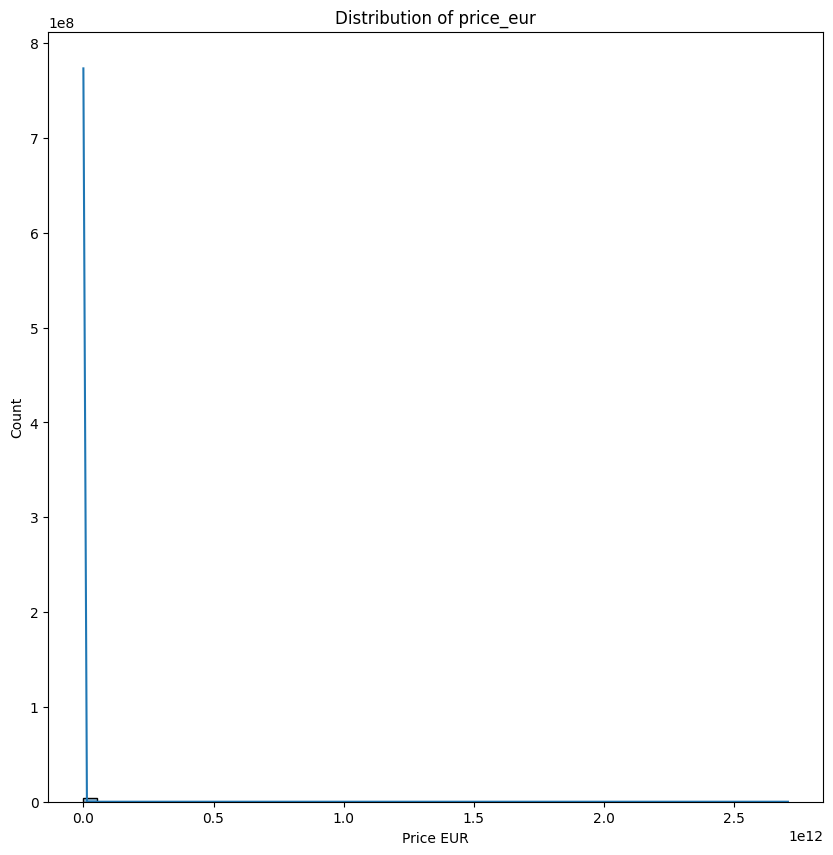

In [37]:
# handling outlier pada data_stage1['price_eur']
# check distribution using histogram
plt.figure(figsize=(10,10))
sns.histplot(data_stage1['price_eur'], bins=50, kde=True)
plt.title('Distribution of price_eur')
plt.xlabel('Price EUR')
plt.show()

Dapat dilihat dari hasil plot, bahwa price_eur sangat skewed ke kanan (right-skewed) dan ada outlier yang sangat ekstrem, yaitu memiliki nilai hingga trilliunan. Sehingga hal itu yang membuat log transform tidak bberhasil untuk meningkatkan performa baseline.

In [38]:
data_stage1['price_eur'].sort_values(ascending=False).head(10)

2046574    2.706149e+12
2161499    2.679451e+12
2046614    2.729847e+11
1720583    1.492235e+10
2002825    1.492235e+10
1944936    1.492235e+10
1742633    1.480387e+10
2042604    1.000000e+09
2249846    1.000000e+09
2012075    9.712194e+08
Name: price_eur, dtype: float64

Nilai sudah dipastikan bukan merupakan nilai yang salah tulis, hal ini mungkin terjadi karena ada pembelian mobil dengan harga yang sangat mahal. 

Cara penangannya adalah kita dapat melakukan capping/winsorization (misal 1%-99% percentile).

In [39]:
# melakukan capping/winsorization
lower = data_stage1['price_eur'].quantile(0.01)
upper = data_stage1['price_eur'].quantile(0.99)

data_stage1['price_eur_capped'] = data_stage1['price_eur'].clip(lower, upper)

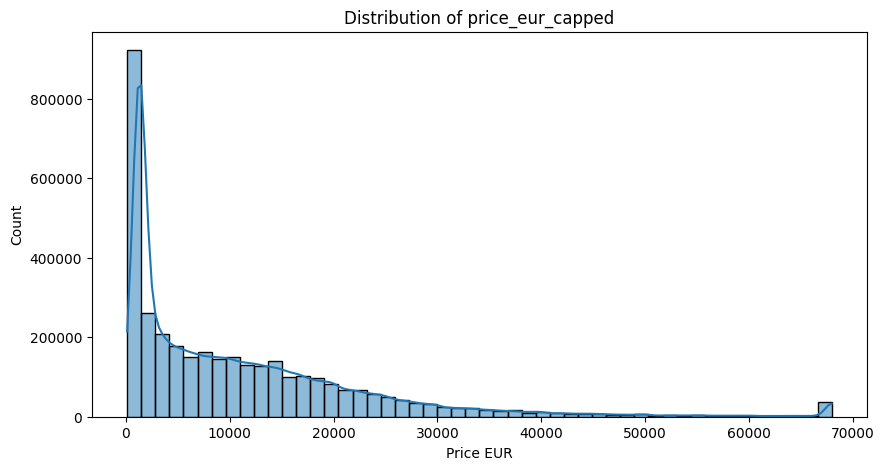

In [73]:
# recheck distribution after capping
plt.figure(figsize=(10,5))
sns.histplot(data_stage1['price_eur_capped'],bins=50, kde=True)
plt.title('Distribution of price_eur_capped')
plt.xlabel('Price EUR')
plt.show()

In [40]:
data_stage1['price_eur_capped'].skew()

2.0160180242175794

Dapat dilihat bahwa skewness mengalami penurunan nilai, dari nilai awal 1323.25 menjadi 2.02, dimana teknik capping sudah menjadi langkah yang tepat.

Langkah selanjutnya karena masih berada skewness > 1, maka akan dilakukan pertimbangan box-cox (skewness < 0.5 sudah cukup normal, tidak perlu melakukan transformasi Box-Cox)

Fitted lambda value: 0.13006245278695983


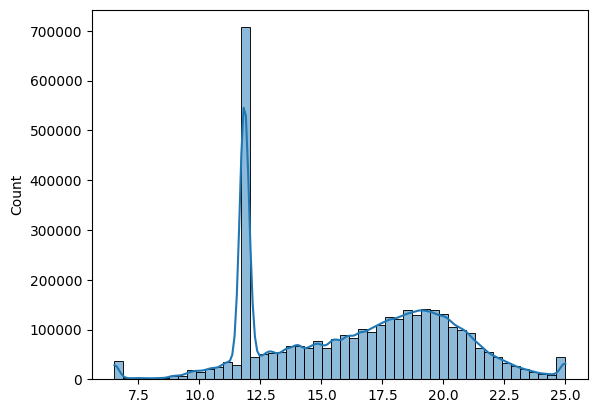

In [41]:
# Melakukan Box-Cox transform
price = data_stage1['price_eur_capped'] + 1
price_boxcox, fitted_lambda = stats.boxcox(price)
print(f"Fitted lambda value: {fitted_lambda}")

sns.histplot(price_boxcox, bins=50,kde=True)
plt.show()

In [42]:
pd.Series(price_boxcox).skew()

-0.047740026190234895

Didapatkan setelah melakukan transformasi dengan box_cox, dimana price_eur sudah cukup simetris, dengan nilai -0.04774 sudah mendekati nilai 0.

Langkah selanjutnya, dilakukan pembuatan ulang baseline model yaitu linear regression menggunakan price baru yaitu price_boxcox.

In [43]:
# pembuatan ulang baseline model
cat_cols = data_stage1.select_dtypes(include=['category','object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['date_created','date_last_seen']] # tanggal tidak masuk

num_cols = data_stage1.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['price_eur','date_created','date_last_seen']]

ohe = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown = 'ignore')
X_cat_ohe = ohe.fit_transform(data_stage1[cat_cols])
X_cat_ohe = pd.DataFrame(X_cat_ohe, columns = ohe.get_feature_names_out(cat_cols), index = data_stage1.index)

X_num_ohe = data_stage1[num_cols]
X = pd.concat([X_cat_ohe, X_num_ohe], axis = 1)
y = price_boxcox

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
# hitung metric model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Set Metrics")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.5f}")

Test Set Metrics
MAE  : 1.52
MSE  : 3.46
RMSE : 1.86
R2   : 0.77281


Didapatkan nilai R2 dari model dengan variabel target menggunakan price_boxcox sudah sesuai, yaitu bernilai 0.77. MAE dan RMSE dari model baru sudah dibawah 2, sehingga dapat dikatakan bahwa skewness sudah ditangani cukup baik.

Selanjutnya, kita akan melakukan pengecekan reabilitas baseline model yang kita miliki dengan menggunakan CV (crossfold-validation).

In [45]:
# Cek reabilitas model dengan cv_scores
X = pd.concat([X_cat_ohe, X_num_ohe], axis = 1)
y = price_boxcox
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f"R2 scores per fold: {cv_scores}")
print(f"Mean CV R2: {np.mean(cv_scores):.5f}")
print(f"Std CV R2: {np.std(cv_scores):.5f}")

R2 scores per fold: [0.77280546 0.77332173 0.77222981 0.77247928 0.77203585]
Mean CV R2: 0.77257
Std CV R2: 0.00045


Didapatkan bahwa mean r2 memiliki nilai mendekati 1, dimana dapat dikatakan bahwa model fit cukup bagus. Dengan std R2, bernilai kecil dimana menandakan bahwa model konsisten, tidak mengalami overfitting.

Mean r2 digunakan untuk melihat seberapa bagus model secara rata rata. Dengan Std r2 berguna untuk melihat sbeerapa stabil performa di fold berbeda. 

Walaupun nilai r2 sudah cukup baik, kita dapat melakukan peningkatan dengan membuat melakukan pembuatan model lain yaitu RandomForest dengan tuning, XGBoost dengan tuning. Selain itu, pertimbangkan feature engineering jika diperlukan.

Dilakukan Ridge/Lasso atau regularisasi apabila datanya overfit, dimana melakukan penambahan penalty supaya model gak overfit, terutama jika terjadi banyak fitu/multikolinearitas, dengan dataset yang lebih kecil dibandingkan jumlah fitur.

In [ ]:
# Random forest dengan tuning hyperparameter menggunakan GridSearchCV
X = pd.concat([X_cat_ohe, X_num_ohe], axis = 1)
y = price_boxcox
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# tentukan grid parameter untuk tuning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2']}

# GridSearchCV untuk 5-fold CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R2 score: {grid_search.best_score_:.5f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# hitung metric model rf after tuning
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Set Metrics (RF after Tuning)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.5f}")

In [ ]:
# model XGBoost dengan tuning hyperparameter menggunakan GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R2 score: {grid_search.best_score_:.5f}")

In [ ]:
# Hitung metric model xgboost after tuning
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Set Metrics (XGBoost after Tuning)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.5f}")